<a href="https://colab.research.google.com/github/Exzort567/cnn_bean_leaf_disease/blob/main/CNN_Bean_Leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input

#Used to "flatten" the features of the last convolution/pooling layer
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


#Or alternatively, use these to flatten the features as input to dense layer
from tensorflow.keras.layers import Flatten

#Weight optimization algorithm (Gradient Descent/Backpropagation)
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_train_path = "/content/gdrive/MyDrive/dataset/train"
data_val_path = "/content/gdrive/MyDrive/dataset/validation"
data_test_path = "/content/gdrive/MyDrive/dataset/test"



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1034 images belonging to 3 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    data_val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 133 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    data_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 128 images belonging to 3 classes.


In [ ]:
input = Input(shape=(224, 224, 3), name="Input")

conv1 = Conv2D(16, (3, 3), activation="relu", name="Conv1")(input)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D((2, 2), name="MaxPool1")(conv1)

conv2 = Conv2D(32, (3, 3), activation="relu", name="Conv2")(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D((2, 2), name="MaxPool2")(conv2)

conv3 = Conv2D(64, (3, 3), activation="relu", name="Conv3")(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D((2, 2), name="MaxPool3")(conv3)

conv4 = Conv2D(128, (3, 3),strides=(2, 2), activation="relu", name="Conv4")(pool3)
conv4 = BatchNormalization()(conv4)
pool4 = MaxPooling2D((2, 2), name="MaxPool4")(conv4)

conv5 = Conv2D(256, (3, 3), activation="relu", name="Conv5")(pool4)
conv5 = BatchNormalization()(conv5)
# pool5 = MaxPooling2D((2, 2), name="MaxPool5")(conv5)  # Remove this line

conv6 = Conv2D(512, (3, 3), activation="relu", name="Conv6")(conv5)
conv6 = BatchNormalization()(conv6)
pool6 = MaxPooling2D((2, 2), name="MaxPool6")(conv6)

features = Flatten()(pool6)

output = Dense(32, activation="relu", name="Classifier")(features)
output = Dropout(0.5)(output)
output = Dense(64, activation="relu", name="Classifier2")(output)
output = Dropout(0.5)(output)
output = Dense(3, activation="softmax", name="Output")(output)

model = Model(inputs=input, outputs=output, name="CNN")
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 111, 111, 16)      0         
                                                                 
 Conv2 (Conv2D)              (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                              

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

In [ ]:
epoch_size=100
history = model.fit(train_generator,
              epochs=epoch_size,
              validation_data=val_generator,
              batch_size =32,
              callbacks=[early_stopping])

Epoch 1/100
33/33 [==============================] - 563s 17s/step - loss: 1.7775 - accuracy: 0.4294 - val_loss: 1.0916 - val_accuracy: 0.3835
Epoch 2/100
33/33 [==============================] - 22s 660ms/step - loss: 1.1019 - accuracy: 0.5087 - val_loss: 1.2003 - val_accuracy: 0.3233
Epoch 3/100
33/33 [==============================] - 19s 576ms/step - loss: 0.9114 - accuracy: 0.5803 - val_loss: 2.1295 - val_accuracy: 0.3308
Epoch 4/100
33/33 [==============================] - 20s 595ms/step - loss: 0.9086 - accuracy: 0.5977 - val_loss: 1.5697 - val_accuracy: 0.3308
Epoch 5/100
33/33 [==============================] - 19s 569ms/step - loss: 0.9118 - accuracy: 0.6044 - val_loss: 1.6931 - val_accuracy: 0.3308
Epoch 6/100
33/33 [==============================] - 19s 566ms/step - loss: 0.8544 - accuracy: 0.6083 - val_loss: 1.9775 - val_accuracy: 0.3308
Epoch 7/100
33/33 [==============================] - 20s 604ms/step - loss: 0.8334 - accuracy: 0.6151 - val_loss: 2.1396 - val_accuracy: 

Text(0.5, 1.0, 'Training Visualization Loss')

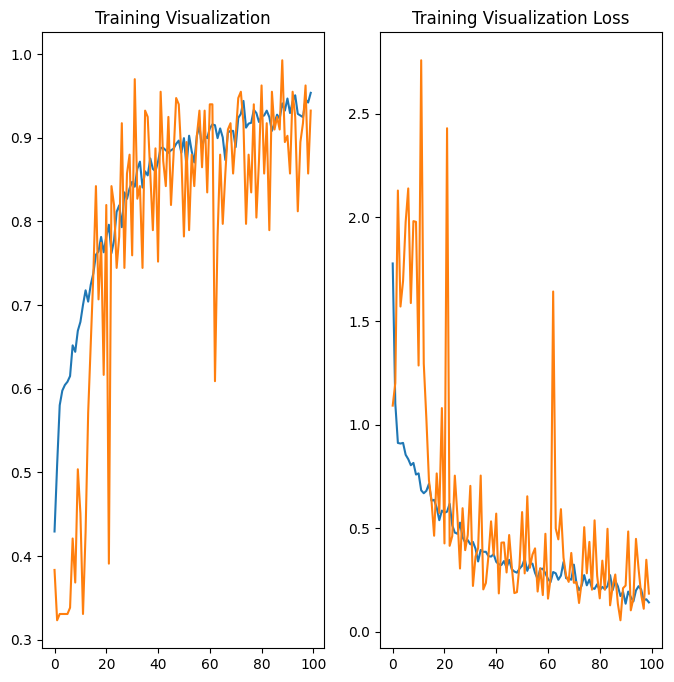

In [ ]:
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Visualization')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Val Loss')
plt.title('Training Visualization Loss')


In [ ]:
loss, accuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 71s 24s/step - loss: 0.3255 - accuracy: 0.8594
Test Loss: 0.32545822858810425
Test Accuracy: 0.859375


1/1 [==============================] - 0s 18ms/step


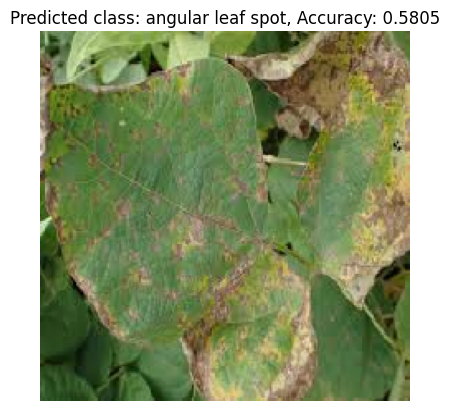

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
#model_path = '/content/gdrive/MyDrive/cnn_model.h5'
#model = load_model(model_path)

# Path to the validation image
validation_image = '/content/ang.jpg'

# Load and preprocess the image
img = image.load_img(validation_image, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class and accuracy
predicted_class = np.argmax(prediction)
class_names = ['angular leaf spot', 'bean rust', 'healthy']
predicted_class_name = class_names[predicted_class]
accuracy = np.max(prediction)

# Display the image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class_name}, Accuracy: {accuracy:.4f}')
plt.show()


In [ ]:
model.save("/content/gdrive/MyDrive/cnn_model_bean_leaf.keras")